In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:


wine = pd.read_csv("/content/drive/MyDrive/Wine Quality.csv",delimiter = ",")
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine.shape

(6497, 13)

Removing null values





In [ ]:
wine.isnull().sum()


,0
type,0
fixed acidity,18
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [ ]:
 wine.dropna(inplace=True)


In [ ]:
wine.isnull().sum()


,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


**Removing** duplicate rows (if present)

In [ ]:
wine.duplicated().sum()


1168

In [ ]:

wine.drop_duplicates(inplace=True)


In [ ]:

wine.duplicated().sum()


0

Handling categorical variables




In [ ]:
wine = pd.get_dummies(wine, columns=['type'])



In [ ]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False,True
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False,True
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False,True
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False,True
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,False,True


feature scaling

In [ ]:
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,False,True
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,False,True
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,False,True
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,False,True
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,False,True


In [ ]:
X = wine.drop('quality', axis=1)
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print("Per-feature minimum before scaling:\n", X_train.min(axis=0))
print("Per-feature maximum before scaling:\n", X_train.max(axis=0))
print("Per-feature minimum after scaling:\n", X_train_scaled.min(axis=0))
print("Per-feature maximum after scaling:\n", X_train_scaled.max(axis=0))

Per-feature minimum before scaling:
 fixed acidity               3.8
volatile acidity           0.08
citric acid                 0.0
residual sugar              0.6
chlorides                 0.009
free sulfur dioxide         1.0
total sulfur dioxide        6.0
density                 0.98711
pH                         2.72
sulphates                  0.22
alcohol                     8.0
type_red                  False
type_white                False
dtype: object
Per-feature maximum before scaling:
 fixed acidity              15.9
volatile acidity           1.58
citric acid                1.66
residual sugar             65.8
chlorides                  0.61
free sulfur dioxide       289.0
total sulfur dioxide      440.0
density                 1.03898
pH                         4.01
sulphates                   2.0
alcohol                    14.9
type_red                   True
type_white                 True
dtype: object
Per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

removing 1-2 variables using correlation as feature selection

In [ ]:

correlation_matrix = wine.corr()

quality_corr = correlation_matrix['quality'].sort_values(ascending=False)

quality_corr


,quality
quality,1.000000
alcohol,0.469298
type_white,0.114268
citric acid,0.097477
free sulfur dioxide,0.054001
sulphates,0.042812
pH,0.037961
total sulfur dioxide,-0.050349
residual sugar,-0.053118
fixed acidity,-0.078883


In [ ]:
threshold = 0.1
drop_features = quality_corr[abs(quality_corr) < threshold].index
wine = wine.drop(drop_features, axis=1)

In [ ]:
wine.head()

,volatile acidity,chlorides,density,alcohol,quality,type_red,type_white
0,0.27,0.045,1.0010,8.8,6,False,True
1,0.30,0.049,0.9940,9.5,6,False,True
2,0.28,0.050,0.9951,10.1,6,False,True
3,0.23,0.058,0.9956,9.9,6,False,True
6,0.32,0.045,0.9949,9.6,6,False,True


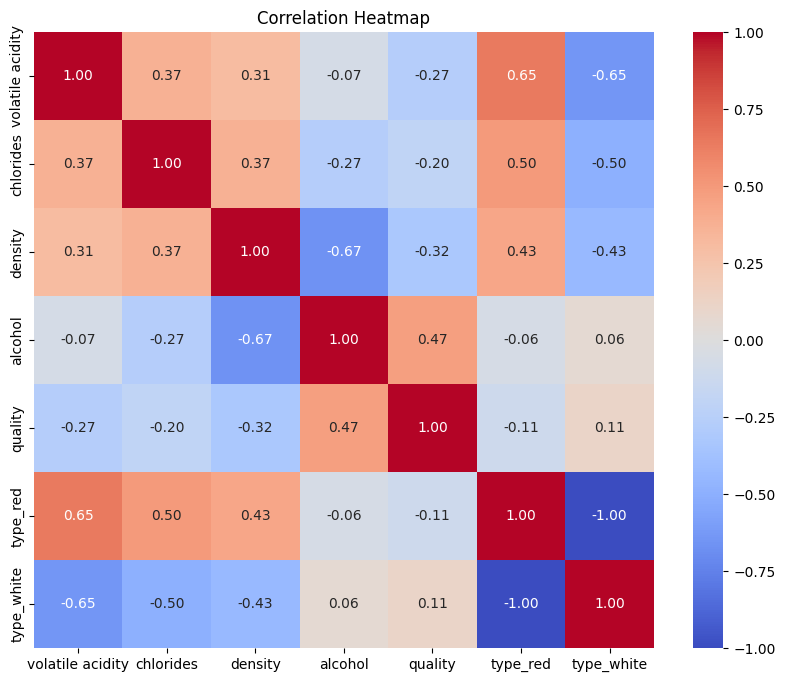

In [ ]:
correlation_matrix = wine.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression RMSE: {rmse}")

Linear Regression MSE: 0.49759094774763774
Linear Regression RMSE: 0.7054012671860165


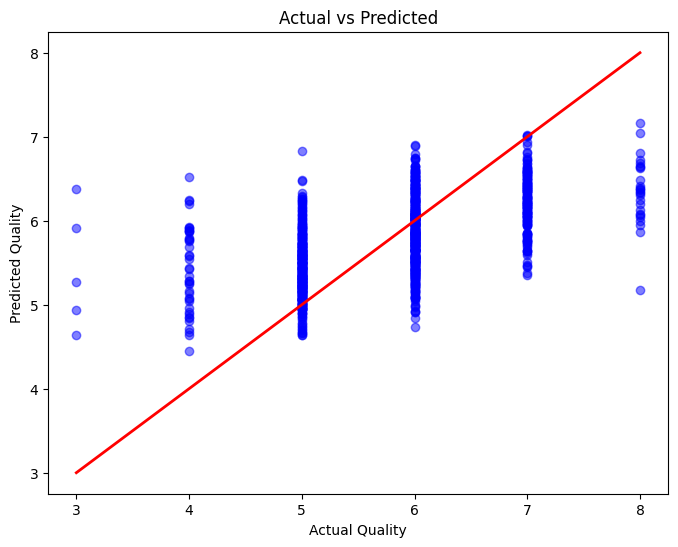

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linewidth=2)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
y_train = np.where(y_train >= 7, 1, 0)
y_test = np.where(y_test >= 7, 1, 0)

In [ ]:

logistic_model = LogisticRegression(max_iter=5000)
logistic_model.fit(X_train, y_train)
y_prediction_class = logistic_model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_prediction_class)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.8223062381852552


In [ ]:
precision = precision_score(y_test, y_prediction_class, zero_division=1)
recall = recall_score(y_test, y_prediction_class, zero_division=1)
f1 = f1_score(y_test, y_prediction_class, zero_division=1)


In [ ]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Precision: 0.5
Recall: 0.26063829787234044
F1-score: 0.34265734265734266


In [ ]:
print("The Training accuracy {:.2f}".format(logistic_model.score(X_train, y_train)))
print("The Testing accuracy  {:.2f}".format(logistic_model.score(X_test, y_test)))

The Training accuracy 0.82
The Testing accuracy  0.82


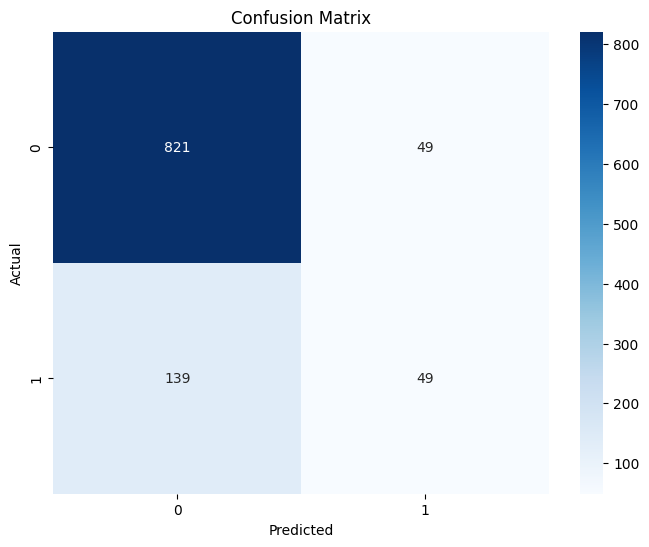

In [ ]:
cm = confusion_matrix(y_test, y_prediction_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()